In [131]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.dates as dates
import datetime
import pandas as pd


In [132]:
#ready data files into variables data (cases) and data_death (deaths)
data=pd.read_csv('cases.dat')
data_death=pd.read_csv('deaths.dat')

In [133]:
#question 5 has been completed- question 6 (the plots) done here.

In [134]:
#define columns
data.columns=['Province','Date','DoublingRate']
data_death.columns=['Province','Date','DoublingRate']
#remove duplicates
names_pr=data.Province.unique() 

#remove negative values that ocurred from testing errors
data = data.loc[data['DoublingRate'] >= 0] #remove negative values
data_death = data_death.loc[data_death['DoublingRate'] >= 0]

In [135]:
#remove year from date- better for plotting
data['Date'] = data['Date'].str.replace('-2020','') 
data_death['Date'] = data_death['Date'].str.replace('-2020','')


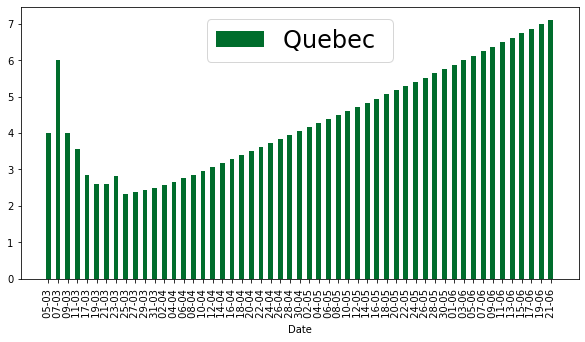

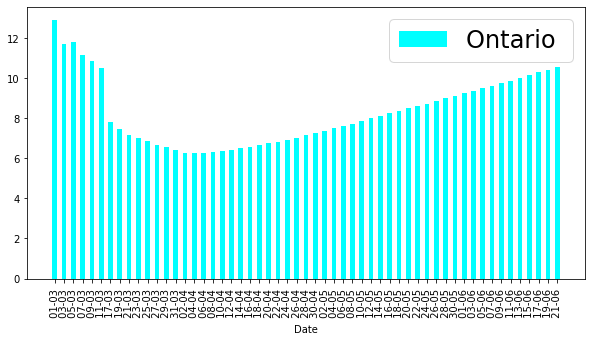

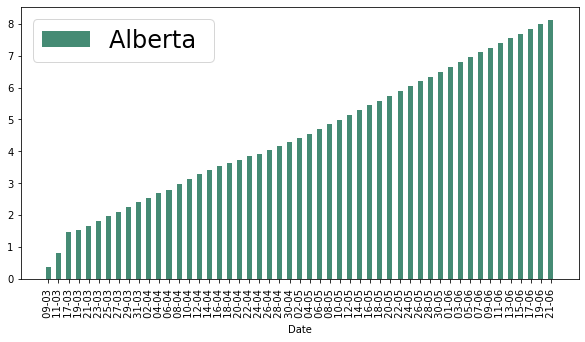

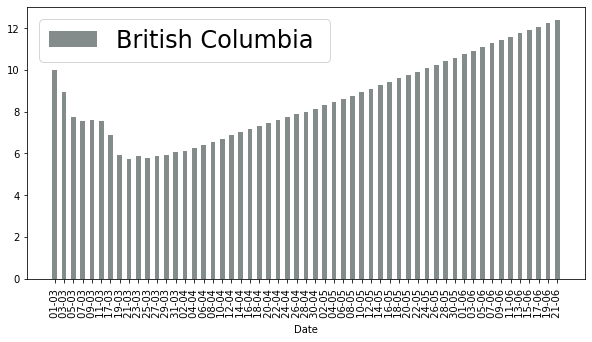

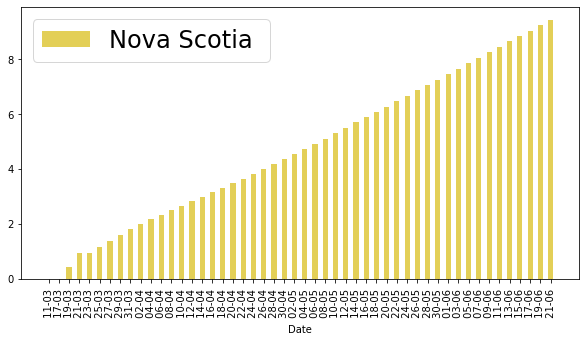

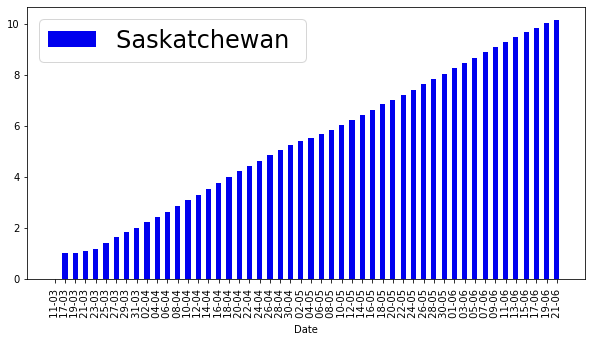

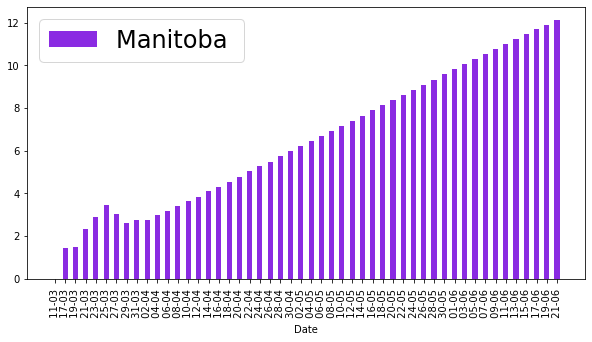

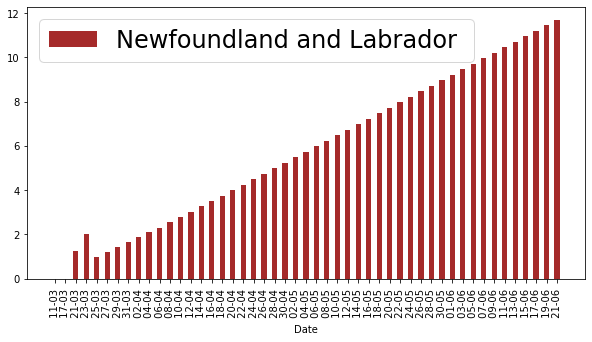

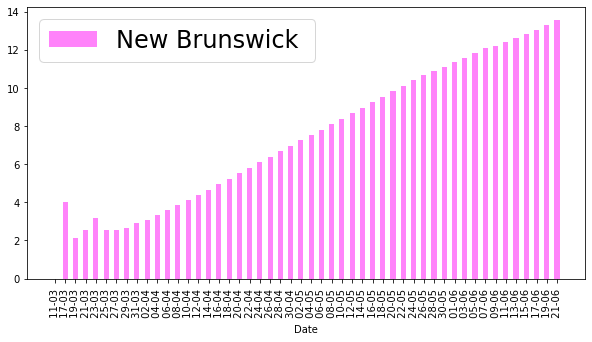

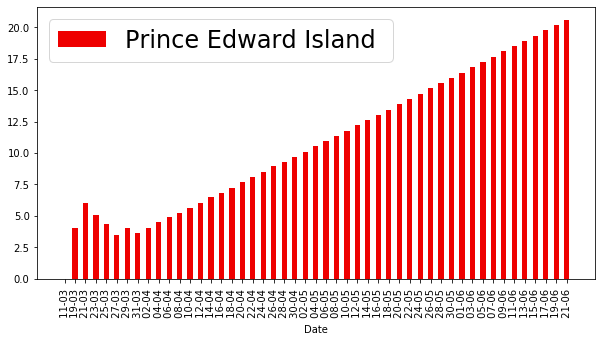

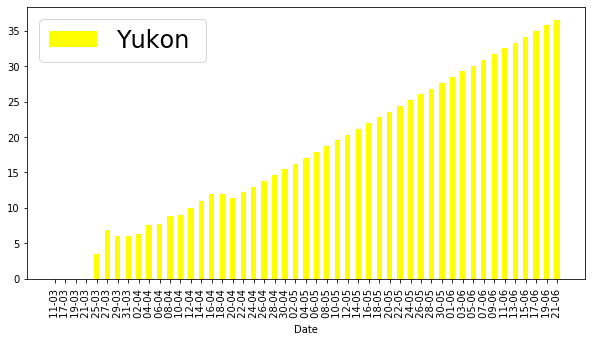

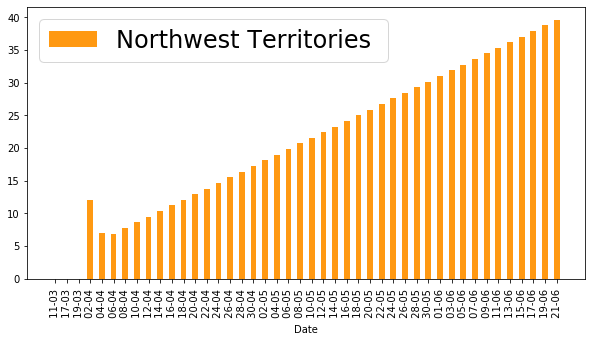

In [136]:

colors = ["#006D2C", "#00FFFF","#458B74","#838B8B","#E3CF57","#0000EE","#8A2BE2","#A52A2A","#FF83FA","#EE0000","#FFFF00","#FF9912","#40E0D0"]


def plot_each_prov_cases(data): 
    """  Given data frame as input, plots the data for each province and saves figures under separate names. Note that this is ideally for COVID cases, due to how the images will be saved. """
    j=0
    i=0
    for i in names_pr[1:]: 
        subset=data.loc[data.Province==i] #subset of data frame for that province
        if subset.empty:
            continue
        a=subset.plot(kind='bar',x='Date',y='DoublingRate', label=i,color=colors[j], figsize=(10,5))
        j=j+1
        title='q6cases'+i+'.png' #save files under different names
        a.legend(fontsize=24)
        a.figure.savefig(title)
        a.autoscale(enable=True)


plot_each_prov_cases(data)


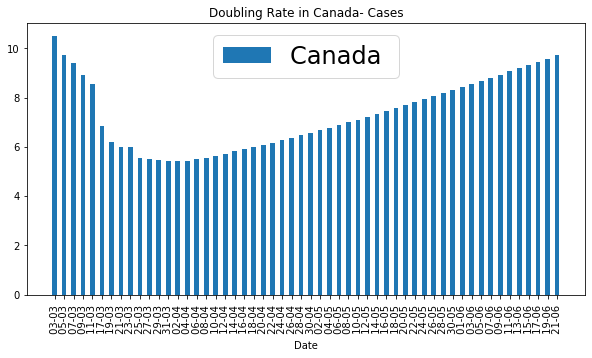

In [137]:
#data for canada- cases (want title here)
subset=data.loc[data.Province=='Canada '] 
ax=subset.plot(kind='bar',x='Date',y='DoublingRate', label=names_pr[0], figsize=(10,5), title="Doubling Rate in Canada- Cases")
ax.autoscale(enable=True)
ax.legend(fontsize=24)
plt.savefig('q6_bar_can.png')


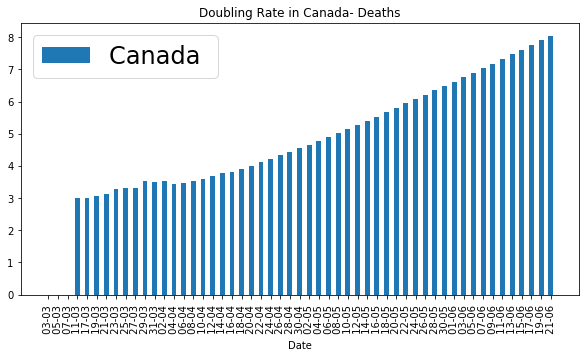

In [138]:
#data for canada - deaths (want title)
subset=data_death.loc[data_death.Province=='Canada '] #subset of data frame
ax1=subset.plot(kind='bar',x='Date',y='DoublingRate', label=names_pr[0], figsize=(10,5), title="Doubling Rate in Canada- Deaths")
ax1.autoscale(enable=True)
ax1.legend(fontsize=24)
plt.savefig('q6_bar_can_death.png')

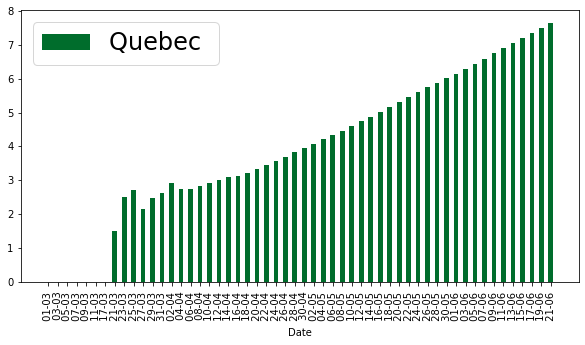

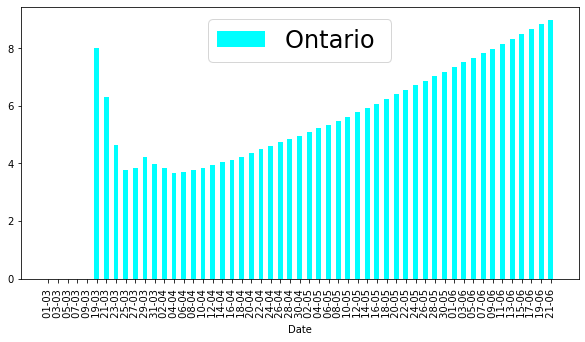

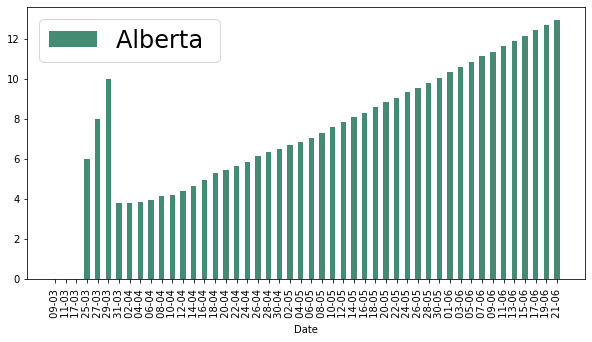

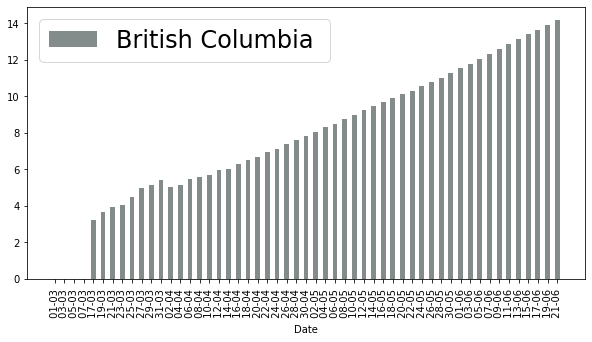

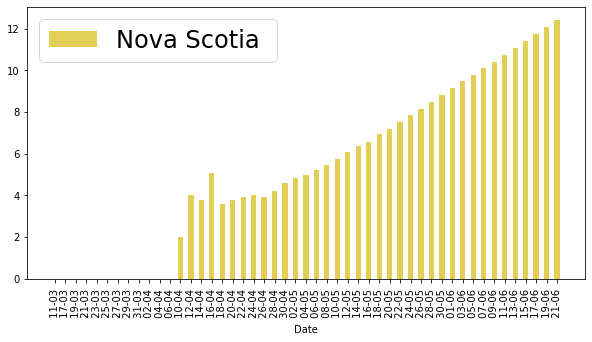

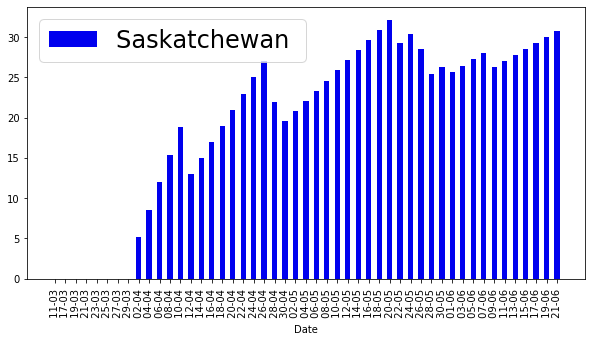

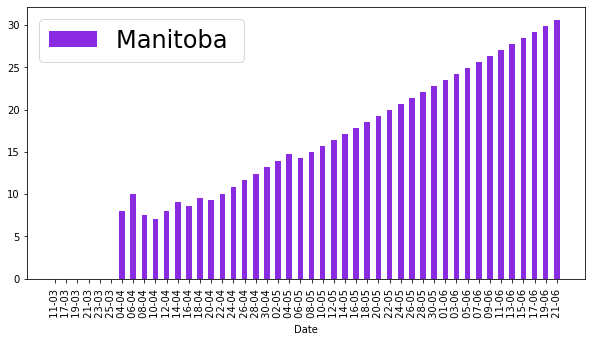

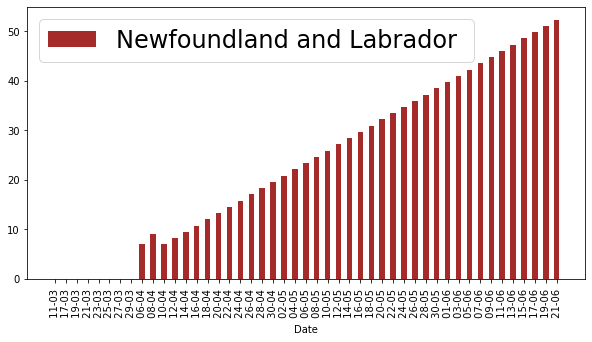

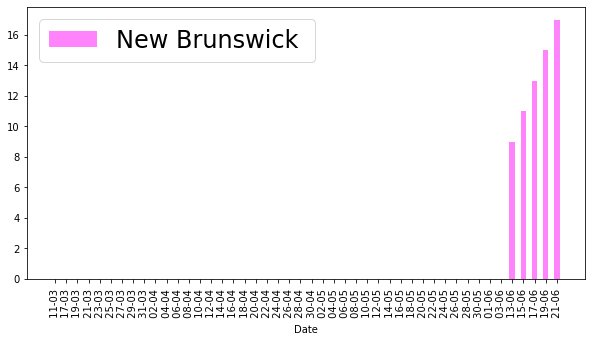

In [139]:
def plot_each_prov_deaths(data): 
    j=0
    i=0
    ''' Given data frame as input, plots the data for each province and saves figures under seaprate names. Same idea as plot_each_prov_cases, but files will be saved under different names.'''
    for i in names_pr[1:]: #each province
        subset=data.loc[data.Province==i] #subset of data frame (data for each province) 
        if subset.empty:
            continue
        a=subset.plot(kind='bar',x='Date',y='DoublingRate', label=i,color=colors[j], figsize=(10,5))
        j=j+1
        title='q6deaths'+i+'.png' #save files under different names
        a.legend(fontsize=24)
        a.figure.savefig(title)
        a.autoscale(enable=True)


plot_each_prov_deaths(data_death)